# CASE STUDY
# SMOTE for Imbalanced Dataset

Generating synthetic samples:
A simple way to create synthetic samples is to sample the attributes from instances in the minority class randomly.

There are systematic algorithms that you can use to generate synthetic samples. The most popular of such algorithms is called SMOTE or the Synthetic Minority Over-sampling Technique. It was proposed in 2002, and you can take a look at the . Following info-graphic will give you a fair idea about the synthetic samples:

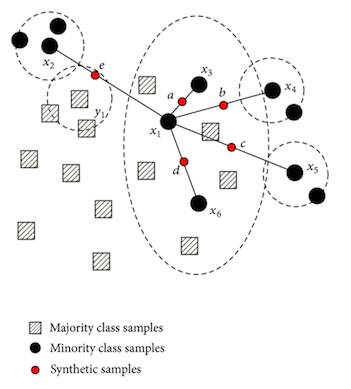

In [1]:
from IPython.display import Image
Image(filename =r'Im1.png')

SMOTE is an oversampling method which creates “synthetic” example rather than oversampling by replacements. The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors. Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen.

The heart of SMOTE is the construction of the minority classes. The intuition behind the construction algorithm is simple. You have already studied that oversampling causes overfitting, and because of repeated instances, the decision boundary gets tightened. What if you could generate similar samples instead of repeating them? In the original SMOTE paper (linked above) it has been shown that to a machine learning algorithm, these newly constructed instances are not exact copies, and thus it softens the decision boundary and thereby helping the algorithm to approximate the hypothesis more accurately.

In [2]:
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE 

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from imblearn.under_sampling import NearMiss
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, 
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


## Bank Marketing Data Set
* <p>https://archive.ics.uci.edu/ml/datasets/bank+marketing</p>

In [5]:
# Load the dataset
bank = pd.read_csv("bank.csv", sep = ";", na_values = "unknown")

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Display the dimensions of the dataset
bank.shape

(4521, 17)

In [8]:
# Replace categorical variables to numeric values and change of format for month column
bank["default"] = bank["default"].map({"no":0,"yes":1})
bank["housing"] = bank["housing"].map({"no":0,"yes":1})
bank["loan"] = bank["loan"].map({"no":0,"yes":1})
bank["y"] = bank["y"].map({"no":0,"yes":1})
bank.education = bank.education.map({"primary": 0, "secondary":1, "tertiary":2})
bank.month = pd.to_datetime(bank.month, format = "%b").dt.month

In [9]:
# Display the records
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,0.0,0,1787,0,0,cellular,19,10,79,1,-1,0,NaN,0
1,33,services,married,1.0,0,4789,1,1,cellular,11,5,220,1,339,4,failure,0
2,35,management,single,2.0,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,2.0,0,1476,1,1,NaN,3,6,199,4,-1,0,NaN,0
4,59,blue-collar,married,1.0,0,0,1,0,NaN,5,5,226,1,-1,0,NaN,0


In [10]:
# Check the presence of null values
bank.isnull().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [11]:
# Drop these two columns
bank.drop(["poutcome", "contact"], axis = 1, inplace = True)

# Drop NA values after the dropping of two columns
bank.dropna(inplace = True)

In [12]:
# Check again null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4311 non-null   int64  
 1   job        4311 non-null   object 
 2   marital    4311 non-null   object 
 3   education  4311 non-null   float64
 4   default    4311 non-null   int64  
 5   balance    4311 non-null   int64  
 6   housing    4311 non-null   int64  
 7   loan       4311 non-null   int64  
 8   day        4311 non-null   int64  
 9   month      4311 non-null   int64  
 10  duration   4311 non-null   int64  
 11  campaign   4311 non-null   int64  
 12  pdays      4311 non-null   int64  
 13  previous   4311 non-null   int64  
 14  y          4311 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 538.9+ KB


In [14]:
# Convert categorical variable into dummy/indicator variables.
bank = pd.get_dummies(bank, drop_first = True)

# Display the y counts
bank.y.value_counts()

0    3813
1     498
Name: y, dtype: int64

In [15]:
# Remove the last column 
X = bank.drop("y", axis = 1)    # Independent variables
y = bank.y                      # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [16]:
y_train.value_counts()

0    2860
1     373
Name: y, dtype: int64

In [17]:
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train, y_train)

# Predict the values
y_pred = lr.predict(X_test)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[933,  20],
       [ 98,  27]], dtype=int64)

In [18]:
# Accuracy and recall based on Logistic regression on imbalanced dataset
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.8905380333951762 0.216


In [19]:
# SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [20]:
np.bincount(y_train)

array([2860, 2860], dtype=int64)

In [21]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[760, 193],
       [ 36,  89]], dtype=int64)

In [22]:
np.bincount(y_train)

array([2860, 2860], dtype=int64)

In [23]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.787569573283859 0.712


# Near-miss
Near-miss is an algorithm that can help in balancing an imbalanced dataset. It can be grouped under undersampling algorithms and is an efficient way to balance the data. The algorithm does this by looking at the class distribution and randomly eliminating samples from the larger class. When two points belonging to different classes are very close to each other in the distribution, this algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution. 

The steps taken by this algorithm are:

1) The algorithm first calculates the distance between all the points in the larger class with the points in the smaller class. This can make the process of undersampling easier. 

2) Select instances of the larger class that have the shortest distance with the smaller class. These n classes need to be stored for elimination. 

3) If there are m instances of the smaller class then the algorithm will return m*n instances of the larger class. 

In [24]:
# NearMiss

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

# Create an object by calling a methof NearMiss()
nr = NearMiss()

# Train the model
X_train, y_train = nr.fit_resample(X_train, y_train)

In [25]:
np.bincount(y_train)

array([373, 373], dtype=int64)

In [26]:
# Ally Logistic regression on new dataset 
lr = LogisticRegression()

# Train the model on resampled dataset
lr.fit(X_train, y_train)

# Predict the values
y_pred = lr.predict(X_test)

# Call and display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[442, 511],
       [  9, 116]], dtype=int64)

In [27]:
# Calculate the accuracy and recall
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.5176252319109462 0.928


## Reference
* <p>https://github.com/saeed-abdul-rahim/tutorials/blob/master/imblearn/SMOTENearMiss.py</p>